     OBJECTID_1  GPS__Latit  GPS__Longi                  Opportunit  \
0             1    8.370314   36.389334        - Dangawaj - 1049769   
1             2    8.337878   36.412284         - Leencha - 1049728   
2             3    8.405700   36.426262           - Marti - 1049727   
3             4    8.329205   36.417575  - Dangawaj Qalaa - 1049726   
4             5    8.299745   36.415112          - Beeroo - 1049725   
..          ...         ...         ...                         ...   
245         246    8.073649   38.248356      - Kecha Beri - 1050277   
246         247    8.070927   38.247823          - Wuribe - 1050276   
247         248    8.087120   38.257906       - Enisilasi - 1050267   
248         249    7.922073   36.085740   Ethiopia - Cole - 1047794   
249         250    7.851399   36.021404   Ethiopia - Suba - 1047796   

                  Level_1_Go          Level_2_Go  \
0              Oromia Region  Bunno Beddele Zone   
1              Oromia Region  Bunno Beddele

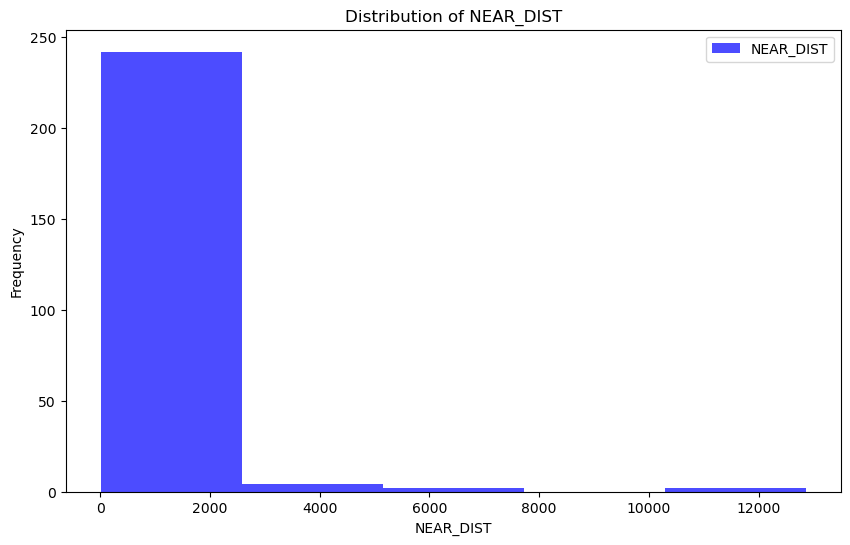

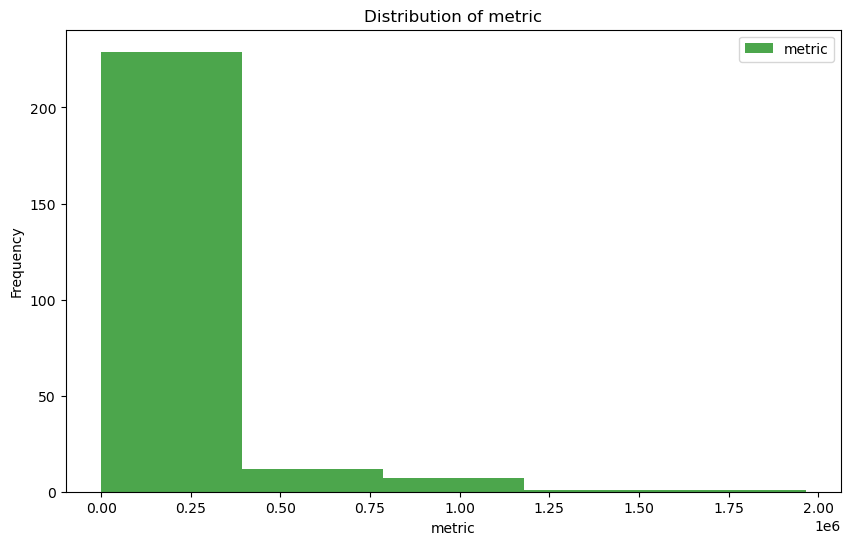

            Width_of_R  River_cros  Days_per_y  NEAR_DIST    metric  \
Width_of_R    1.000000    0.195462    0.553201  -0.072549 -0.099333   
River_cros    0.195462    1.000000   -0.091250  -0.053046 -0.056557   
Days_per_y    0.553201   -0.091250    1.000000   0.024066 -0.071991   
NEAR_DIST    -0.072549   -0.053046    0.024066   1.000000 -0.087388   
metric       -0.099333   -0.056557   -0.071991  -0.087388  1.000000   
POPULATION   -0.103279   -0.007678   -0.142062  -0.092099  0.072596   

            POPULATION  
Width_of_R   -0.103279  
River_cros   -0.007678  
Days_per_y   -0.142062  
NEAR_DIST    -0.092099  
metric        0.072596  
POPULATION    1.000000  


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Step 1: Data Cleaning and Preparation
# Load data
# data = {
#     'NEAR_DIST': [96.6365, 691.608, 217.5624, 30.3182, 214.9084, 407.1713, 190.6094, 239.7337, 384.898, 144.0964],
#     'metric': [253459.2367, 160009.5774, 217699.9261, 136891.5213, 124815.2254, 174303.1449, 115832.1783, 229518.8521, 153249.0706, 243165.5181],
#     'POPULATION': [485.7903, 4963.2146, 611.3215, 6052.9218, 474.0575, 480.5226, 695.1304, 335.3945, 448.6252, 398.4211],
#     'GPS_Latit': [8.3703, 8.3379, 8.4057, 8.3292, 8.2997, 8.2424, 8.2719, 8.3051, 8.3062, 8.3183],
#     'GPS_Longi': [36.3893, 36.4123, 36.4263, 36.4176, 36.4151, 36.3986, 36.5034, 36.4751, 36.4707, 36.4756],
#     'Woreda': ['Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi', 'Gechi'],
#     'Opportunit': ['Dangawaj - 1049769', '- Leencha - 1049728', '- Marti - 1049727', 'Dangawaj Qalaa - 1049726', 'Beeroo - 1049725', 'Golli - 1049724', '- Amiinoo - 1049723', '- Kobbaa - 1049722', '- Kobbaa - 1049721', '- Chancho - 1049720']
# }

df = pd.read_excel('Assessedsites_Fully_Assessed_Woredas_Trail_Bridges_Only_TableToExcel.xlsx')

# Convert 'metric' and 'POPULATION' columns to string type and then remove commas
df['metric'] = df['metric'].astype(str).str.replace(',', '').astype(float)
df['POPULATION'] = df['POPULATION'].astype(str).str.replace(',', '').astype(float)

print(df)

# Step 3: Visualization
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['NEAR_DIST'], bins=5, alpha=0.7, color='blue', label='NEAR_DIST')
plt.xlabel('NEAR_DIST')
plt.ylabel('Frequency')
plt.title('Distribution of NEAR_DIST')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['metric'], bins=5, alpha=0.7, color='green', label='metric')
plt.xlabel('metric')
plt.ylabel('Frequency')
plt.title('Distribution of metric')
plt.legend()
plt.show()

# Exclude non-numeric and specific columns when calculating correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_to_exclude = ['GPS__Latit', 'GPS__Longi', 'OBJECTID_1','RemoteSite_ID','COUNT','time_delta']
correlation_matrix = df[numeric_cols].drop(columns=cols_to_exclude).corr()

print(correlation_matrix)

# Step 5: Geospatial Analysis
m = folium.Map(location=[np.mean(df['GPS__Latit']), np.mean(df['GPS__Longi'])], zoom_start=10)
for i in range(len(df)):
    folium.Marker([df.iloc[i]['GPS__Latit'], df.iloc[i]['GPS__Longi']], popup=df.iloc[i]['Opportunit']).add_to(m)
m.save('map.html')

# Step 6: Conclusion
# Draw conclusions based on the analysis


In [17]:
import plotly.graph_objects as go
# Create box plots
fig1 = go.Figure()
fig1.add_trace(go.Box(y=df['NEAR_DIST'], name='NEAR_DIST'))
fig1.update_layout(title='Box Plot of NEAR_DIST')

fig2 = go.Figure()
fig2.add_trace(go.Box(y=df['metric'], name='metric'))
fig2.update_layout(title='Box Plot of metric')

fig3 = go.Figure()
fig3.add_trace(go.Box(y=df['POPULATION'], name='POPULATION'))
fig3.update_layout(title='Box Plot of POPULATION')

# Save box plots as HTML files
fig1.write_html('boxplot_near_dist.html')
fig2.write_html('boxplot_metric.html')
fig3.write_html('boxplot_population.html')

In [22]:
import folium
import numpy as np
import pandas as pd

df = pd.read_excel('Assessedsites_Fully_Assessed_Woredas_Trail_Bridges_Only_TableToExcel.xlsx')

# Compute outliers for each category
Q1 = df[['NEAR_DIST', 'metric', 'POPULATION']].quantile(0.25)
Q3 = df[['NEAR_DIST', 'metric', 'POPULATION']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_near_dist = df[(df['NEAR_DIST'] < lower_bound['NEAR_DIST']) | (df['NEAR_DIST'] > upper_bound['NEAR_DIST'])]
outliers_metric = df[(df['metric'] < lower_bound['metric']) | (df['metric'] > upper_bound['metric'])]
outliers_population = df[(df['POPULATION'] < lower_bound['POPULATION']) | (df['POPULATION'] > upper_bound['POPULATION'])]

# Create Folium map
m = folium.Map(location=[np.mean(df['GPS__Latit']), np.mean(df['GPS__Longi'])], zoom_start=10)

# Create legend
legend_html = """
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b><br>
     &nbsp; NEAR_DIST &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Metric &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; POPULATION &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
      </div>
     """

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Add markers to the map, distinguishing outliers with different colors
for i in range(len(df)):
    popup_text = df.iloc[i]['Opportunit']
    lat = df.iloc[i]['GPS__Latit']
    lon = df.iloc[i]['GPS__Longi']
    
    if i in outliers_near_dist.index:
        color = 'red'
    elif i in outliers_metric.index:
        color = 'blue'
    elif i in outliers_population.index:
        color = 'green'
    else:
        color = 'black'
    
    folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color=color)).add_to(m)

# Save map
m.save('map_with_outliers_and_legend.html')


In [40]:

import geopandas as gpd
All_remote = gpd.read_file('All_Remote_FullyAssessed_Woredas\Remotesites_Fully_Assessed_Woredas.shp')

# Print all column names in the DataFrame
print(All_remote.columns)


Index(['Remotesite', 'Remotesi_1', 'Remotesi_2', 'Remotesi_3', 'Remotesi_4',
       'Remotesi_5', 'Remotesi_6', 'Remotesi_7', 'Remotesi_8', 'Remotesi_9',
       'Remotes_10', 'Remotes_11', 'Remotes_12', 'Remotes_13', 'Remotes_14',
       'Remotes_15', 'Remotes_16', 'Remotes_17', 'Remotes_18', 'Remotes_19',
       'Remotes_20', 'Remotes_21', 'Assessedsi', 'Assessed_1', 'Assessed_2',
       'Assessed_3', 'Assessed_4', 'Assessed_5', 'Assessed_6', 'Assessed_7',
       'Assessed_8', 'Assessed_9', 'Assesse_10', 'Assesse_11', 'Assesse_12',
       'Assesse_13', 'Assesse_14', 'Assesse_15', 'Assesse_16', 'Assesse_17',
       'Assesse_18', 'Assesse_19', 'Assesse_20', 'Assesse_21', 'Assesse_22',
       'Assesse_23', 'ZonalSt_As', 'ZonalSt__1', 'ZonalSt__2', 'ZonalSt__3',
       'ZonalSt__4', 'ZonalSt__5', 'geometry'],
      dtype='object')


In [44]:
import geopandas as gpd
import folium
import numpy as np
import pandas as pd

# Read All remotely identified sites in the fully assessed woredas
All_remote = gpd.read_file('All_Remote_FullyAssessed_Woredas\Remotesites_Fully_Assessed_Woredas.shp')

# Read the shapefile containing waterways
waterways = gpd.read_file('Waterways\ethiopia_waterways_mode_Clip.shp')

# Read the shapefile containing remotely identified sites
remotely_identified_sites_neardist = gpd.read_file('Remote_Neardist\Remotesites_Fully_Assessed_Woredas_neardist.shp')

# Read the data containing the outliers
df = pd.read_excel('Assessedsites_Fully_Assessed_Woredas_Trail_Bridges_Only_TableToExcel.xlsx')

# Compute outliers for each category
Q1 = df[['NEAR_DIST', 'metric', 'POPULATION']].quantile(0.25)
Q3 = df[['NEAR_DIST', 'metric', 'POPULATION']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_near_dist = df[(df['NEAR_DIST'] < lower_bound['NEAR_DIST']) | (df['NEAR_DIST'] > upper_bound['NEAR_DIST'])]
outliers_metric = df[(df['metric'] < lower_bound['metric']) | (df['metric'] > upper_bound['metric'])]
outliers_population = df[(df['POPULATION'] < lower_bound['POPULATION']) | (df['POPULATION'] > upper_bound['POPULATION'])]

# Create Folium map with OpenStreetMap tileset (street view)
m = folium.Map(location=[np.mean(df['GPS__Latit']), np.mean(df['GPS__Longi'])], zoom_start=10, tiles='OpenStreetMap')

# Add waterways to the map
folium.GeoJson(waterways, name='Waterways').add_to(m)

# Add all the remotely identified sites
All_remotely_identified_group = folium.FeatureGroup(name='All Remotely Identified Sites ')
for _, site in All_remote.iterrows():
    folium.Marker(location=[site.geometry.y, site.geometry.x], popup=site['Remotesite'], icon=folium.Icon(color='purple')).add_to(All_remotely_identified_group)
All_remotely_identified_group.add_to(m)

# Add remotely identified sites mapped to nearest distance to the map with custom icon
remotely_identified_group = folium.FeatureGroup(name='Remotely Identified Sites Near Distance')
for _, site in remotely_identified_sites_neardist.iterrows():
    folium.Marker(location=[site.geometry.y, site.geometry.x], popup=site['Opportunit'], icon=folium.Icon(color='green')).add_to(remotely_identified_group)
remotely_identified_group.add_to(m)

# Add outliers to the map with custom icon and data in the popup
outliers_near_dist_group = folium.FeatureGroup(name='Outliers (NEAR_DIST)')
for _, outlier in outliers_near_dist.iterrows():
    popup_text = f"Name: {outlier['Opportunit']}\nNEAR_DIST: {outlier['NEAR_DIST']}\nmetric: {outlier['metric']}\nPOPULATION: {outlier['POPULATION']}"
    folium.Marker(location=[outlier['GPS__Latit'], outlier['GPS__Longi']], popup=popup_text, icon=folium.Icon(color='red')).add_to(outliers_near_dist_group)
outliers_near_dist_group.add_to(m)

outliers_metric_group = folium.FeatureGroup(name='Outliers (metric)')
for _, outlier in outliers_metric.iterrows():
    popup_text = f"Name: {outlier['Opportunit']}\nNEAR_DIST: {outlier['NEAR_DIST']}\nmetric: {outlier['metric']}\nPOPULATION: {outlier['POPULATION']}"
    folium.Marker(location=[outlier['GPS__Latit'], outlier['GPS__Longi']], popup=popup_text, icon=folium.Icon(color='blue')).add_to(outliers_metric_group)
outliers_metric_group.add_to(m)

outliers_population_group = folium.FeatureGroup(name='Outliers (POPULATION)')
for _, outlier in outliers_population.iterrows():
    popup_text = f"Name: {outlier['Opportunit']}\nNEAR_DIST: {outlier['NEAR_DIST']}\nmetric: {outlier['metric']}\nPOPULATION: {outlier['POPULATION']}"
    folium.Marker(location=[outlier['GPS__Latit'], outlier['GPS__Longi']], popup=popup_text, icon=folium.Icon(color='orange')).add_to(outliers_population_group)
outliers_population_group.add_to(m)

# Add original points (non-outliers) to the map in black
original_points_group = folium.FeatureGroup(name='Assessed Sites')
for index, row in df.iterrows():
    if index not in outliers_near_dist.index and index not in outliers_metric.index and index not in outliers_population.index:
        popup_text = f"Original Point\nName: {row['Opportunit']}"
        folium.Marker(location=[row['GPS__Latit'], row['GPS__Longi']], popup=popup_text, icon=folium.Icon(color='black')).add_to(original_points_group)
original_points_group.add_to(m)

# Create legend
legend_html = """
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 150px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b><br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i> All Remotely Identified Site<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i> Remotely Identified Site_ND<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i> Outlier (NEAR_DIST)<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Outlier (metric)<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i> Outlier (POPULATION)<br>
      </div>
     """

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Add Layer Control with the option to toggle between street view and imagery view
folium.LayerControl(collapsed=False).add_to(m)

# Save map
m.save('map_with_outliers_sites_and_waterways.html')
